# Embedding in traditional features

In [1]:
import os
import pandas as pd
import numpy as np
import json
from pathlib import Path
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import umap
from IPython.display import Image

from plot_functions import mara_3Dplot, umap_2Dplot

In [2]:
wd = os.getcwd()

DATA = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "processed")
FIGURES = os.path.join(os.path.sep, str(Path(wd).parents[0]), "reports", "figures")
feature_type = "SNR_filtered"


if feature_type=="SNR_filtered":
    FEATURES_DF = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "acoustic_features", "mara_features_SNR10_simple_2021aug.csv")
else:
    FEATURES_DF = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "acoustic_features", "mara_features_allSNR_2021aug.csv")


df = pd.read_pickle(os.path.join(os.path.sep, DATA, 'df_focal_reduced.pkl'))
embedding_filename = 'basic_UMAP_3D_reduced_default_params.csv'
embedding = np.loadtxt(os.path.join(os.path.sep, DATA, embedding_filename),delimiter=";")

df['UMAP1'] = embedding[:,0]
df['UMAP2'] = embedding[:,1]
df['UMAP3'] = embedding[:,2]

dftype='reduced'

# Load datasets

In [3]:
features = pd.read_csv(FEATURES_DF)
features.head(20)

,FILE_NAME,Energy_Duration,Cepstral_Peak_Prominence,Centroid_Frequency,Bandwidth_RMS,F0_start,F0_mid,F0_end,F0_SLOPE
0,HM_HMB_R11_AUDIO_file_4_(2017_08_23-06_44_59)_...,0.185125,14.504841,871.693507,394.355424,765.625000,929.687500,1046.875000,1519.243754
1,HM_HMB_R11_AUDIO_file_4_(2017_08_23-06_44_59)_...,0.144750,11.905767,1049.584141,785.629589,367.187500,421.875000,315.104167,-359.815774
2,HM_HMB_R11_AUDIO_file_4_(2017_08_23-06_44_59)_...,0.139750,14.771152,897.916049,440.750726,953.125000,953.125000,750.000000,-1453.488372
3,HM_HMB_R11_AUDIO_file_4_(2017_08_23-06_44_59)_...,0.135375,16.943661,1080.583121,442.913446,1062.500000,1101.562500,884.765625,-1312.903970
4,HM_HMB_R11_AUDIO_file_4_(2017_08_23-06_44_59)_...,0.211500,15.317549,1158.155987,399.729262,1039.062500,1156.250000,742.187500,-1403.664303
5,HM_HMB_R11_AUDIO_file_4_(2017_08_23-06_44_59)_...,0.132125,18.782934,1032.524517,384.877036,520.833333,667.100694,657.118056,1031.483233
6,HM_HMB_R11_AUDIO_file_4_(2017_08_23-06_44_59)_...,0.102625,15.835931,1037.668151,377.665424,1132.812500,1218.750000,1148.437500,152.253350
7,HM_HMB_R11_AUDIO_file_4_(2017_08_23-06_44_59)_...,0.107500,15.339324,963.785510,361.577233,914.062500,1078.125000,1031.250000,1090.116279
8,HM_HMB_R11_AUDIO_file_4_(2017_08_23-06_44_59)_...,0.151375,16.092063,1015.329288,449.963089,1054.687500,1164.062500,1062.500000,51.610239
9,HM_HMB_R11_AUDIO_file_4_(2017_08_23-06_44_59)_...,0.119500,16.140938,1144.346461,389.955754,1039.062500,1164.062500,1117.187500,653.765690


In [4]:
features['callID'] = [x[:-4].replace('.', '_') for x in features.FILE_NAME]

Check for NA values

In [5]:
features.isnull().sum()

FILE_NAME                   0
Energy_Duration             0
Cepstral_Peak_Prominence    0
Centroid_Frequency          0
Bandwidth_RMS               0
F0_start                    0
F0_mid                      0
F0_end                      0
F0_SLOPE                    0
callID                      0
dtype: int64

In [6]:
print(features.shape)
print(df.shape)

(5494, 10)
(6428, 37)


In [7]:
total_df = pd.merge(df, features, left_on="callID", right_on="callID", how="left")

In [8]:
total_df = total_df.loc[~total_df.Energy_Duration.isnull(),:]
total_df.shape

(5494, 46)

In [9]:
total_df.isnull().sum()

Name                                  0
Start                                 0
Duration                              0
Time Format                         125
Type                                  0
Description                        5494
start_s                               0
duration_s                            0
stop_s                                0
date                                  0
samplerate_hz                         0
indv                                  0
original_wav                          0
bout_number                           0
Time.Format                        5369
call_lable                            0
unsure_call                           0
noisy                                 0
certain_yn                            0
soundfoc_yn                           0
nonfocal_yn                           0
callID                                0
Sex                                   0
status                                0
raw_audio                             0


# Check if reasonable

Boxplot for different variables based on calltype

In [10]:
truth = 'call_lable'

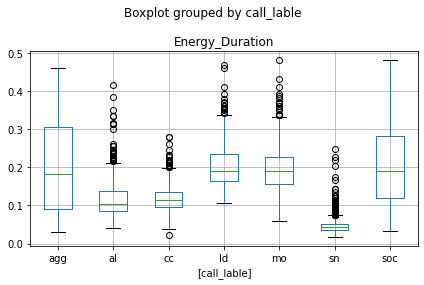

In [11]:
boxplot = total_df[[truth, 'Energy_Duration']].boxplot(by=truth)
plt.tight_layout()

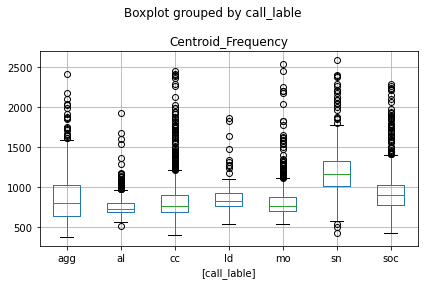

In [12]:
boxplot = total_df[[truth, 'Centroid_Frequency']].boxplot(by=truth)
plt.tight_layout()

# Dimensionality reduction with features

In [10]:
acoustic_features = list(features.columns)

In [11]:
acoustic_features

['FILE_NAME',
 'Energy_Duration',
 'Cepstral_Peak_Prominence',
 'Centroid_Frequency',
 'Bandwidth_RMS',
 'F0_start',
 'F0_mid',
 'F0_end',
 'F0_SLOPE',
 'callID']

In [12]:
acoustic_features.remove('FILE_NAME')
acoustic_features.remove('callID')
if 'SNR' in acoustic_features:
    acoustic_features.remove('SNR') 

acoustic_features

['Energy_Duration',
 'Cepstral_Peak_Prominence',
 'Centroid_Frequency',
 'Bandwidth_RMS',
 'F0_start',
 'F0_mid',
 'F0_end',
 'F0_SLOPE']

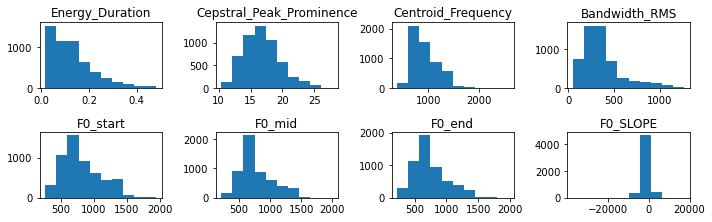

In [16]:
import matplotlib.pyplot as plt

nrows=4
ncols=4

k=1
plt.figure(figsize=(10,6))
for feat in acoustic_features:
    plt.subplot(4,4,k)
    n, bins, patches = plt.hist(total_df[feat])
    plt.title(feat)
    k+=1
plt.tight_layout()

##### z-transform

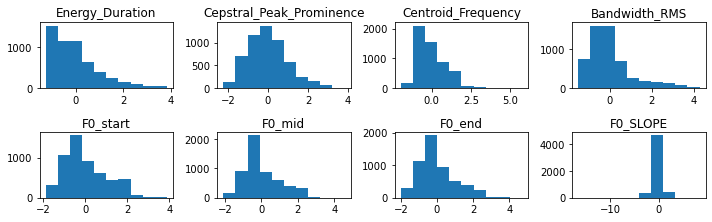

In [17]:
data = total_df[acoustic_features]
data_z = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)

nrows=4
ncols=4

k=1
plt.figure(figsize=(10,6))
for feat in acoustic_features:
    plt.subplot(4,4,k)
    n, bins, patches = plt.hist(data_z[feat])
    plt.title(feat)
    k+=1
plt.tight_layout()

"Again, I would recommend log-transforming duration and frequency values. At least Duration, Centroid Frequency, and Bandwidth are closer to normal distribution after log-transform, and it doesn't seem to hurt F0 measurements (though of course slope, which can be negative, cannot be log transformed)."

In [114]:
#for feat in ['Energy_Duration', 'Centroid_Frequency', 'Peak_Frequency',
#             'lower_frequency_10dB', 'Upper_Frequency_10dB',
#             'Bandwidth_10dB', 'Bandwidth_RMS', 'Bandwidth_RMS']:
#    total_df[feat] = np.log(total_df[feat])

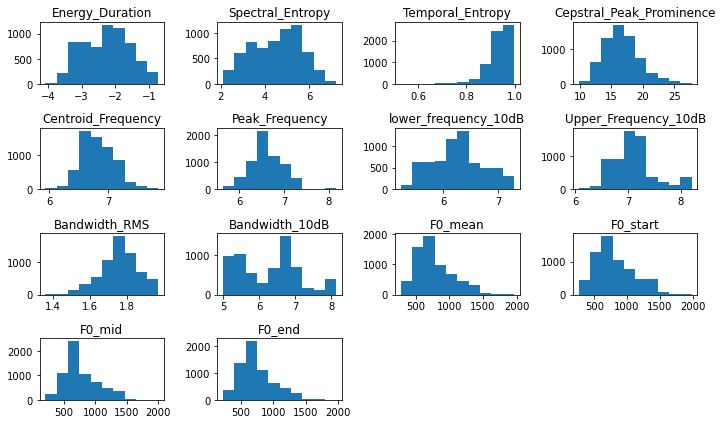

In [115]:
#nrows=4
#ncols=4

#k=1
#plt.figure(figsize=(10,6))
#for feat in acoustic_features:
#    plt.subplot(4,4,k)
#    n, bins, patches = plt.hist(total_df[feat])
#    plt.title(feat)
#    k+=1
#plt.tight_layout()

In [13]:
# A) Full dataset
data = total_df[acoustic_features]
labels = total_df['call_lable']

z-transform

In [14]:
data_z = StandardScaler().fit_transform(data)
data_z.shape

(5494, 8)

## UMAP

### Acoustic feature based

In [15]:
#UMAP
reducer = umap.UMAP(n_components = 3, min_dist=0, random_state=2204)
embedding_trad =  reducer.fit_transform(data_z)

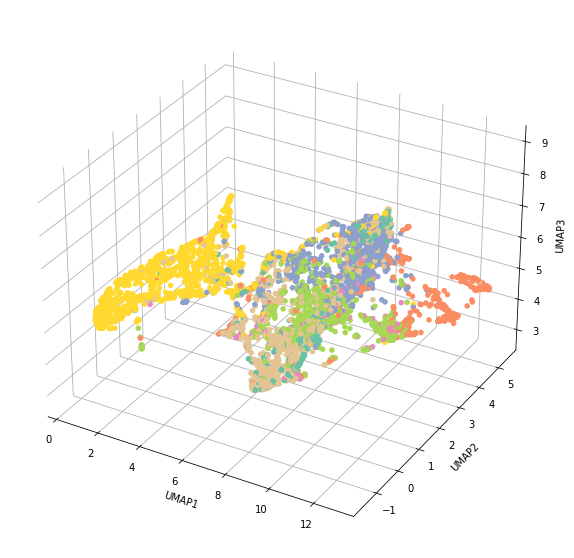

In [16]:
mara_3Dplot(embedding_trad[:,0],
            embedding_trad[:,1],
            embedding_trad[:,2],
            labels,
            "Set2",
            outname=None,
            showlegend=False)

In [17]:
reducer = umap.UMAP(n_components = 2, min_dist=0, random_state=2204)
embedding_trad_2D =  reducer.fit_transform(data_z)

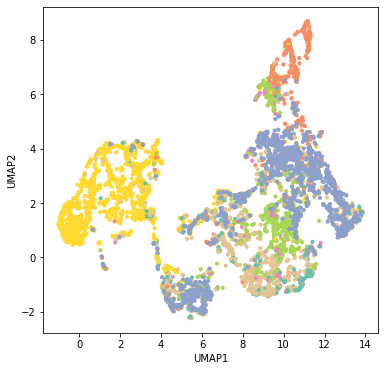

In [18]:
umap_2Dplot(embedding_trad_2D[:,0], embedding_trad_2D[:,1], labels, "Set2", outname=None, showlegend=False)

### Spectrogram based

In [19]:
from preprocessing_functions import calc_zscore,create_padded_data

In [20]:
specs = total_df.spectrograms.copy()
specs = [calc_zscore(x) for x in specs] 
data = create_padded_data(specs)

In [21]:
reducer = umap.UMAP(n_components = 3, min_dist=0, random_state=2204)
embedding =  reducer.fit_transform(data)

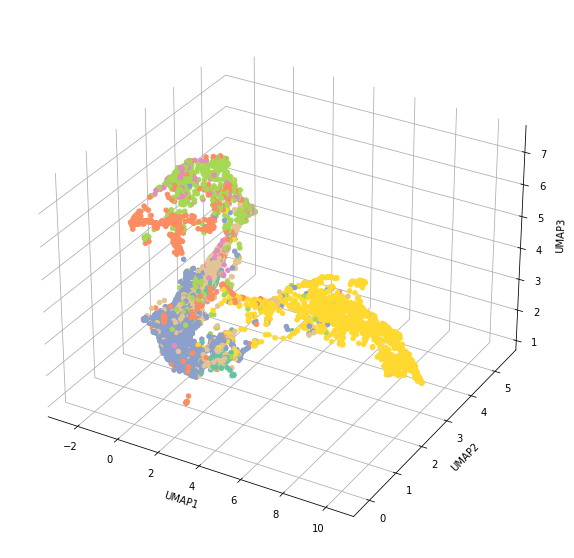

In [22]:
mara_3Dplot(embedding[:,0],
            embedding[:,1],
            embedding[:,2],
            labels,
            "Set2",
            outname=None,
            showlegend=False)

In [23]:
reducer = umap.UMAP(n_components = 2, min_dist=0, random_state=2204)
embedding_2D =  reducer.fit_transform(data)

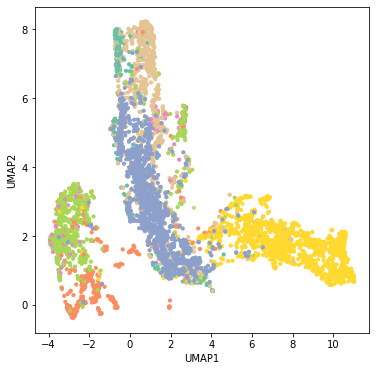

In [24]:
umap_2Dplot(embedding_2D[:,0], embedding_2D[:,1], labels, "Set2", outname=None, showlegend=False)

# Evaluate embedding

In [25]:
OVERWRITE_FIGURES = True

In [26]:
from evaluation_functions import nn, sil

In [27]:
nn_stats_spec = nn(embedding, np.asarray(labels), k=5)
print("Spectrogram approach")
print("*******************************")
print("Log final metric (unweighted):",nn_stats_spec.get_S())
print("Abs final metric (unweighted):",nn_stats_spec.get_Snorm())

Spectrogram approach
*******************************
Log final metric (unweighted): 63.38391801624244
Abs final metric (unweighted): 2.3748533967575143


In [28]:
nn_stats = nn(embedding_trad, np.asarray(labels), k=5)
print("Acoustic features approach")
print("*******************************")
print("Log final metric (unweighted):",nn_stats.get_S())
print("Abs final metric (unweighted):",nn_stats.get_Snorm())

Acoustic features approach
*******************************
Log final metric (unweighted): 52.197766453882295
Abs final metric (unweighted): 2.0584222547570685


/home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/trad_heatS_UMAP_reduced.png


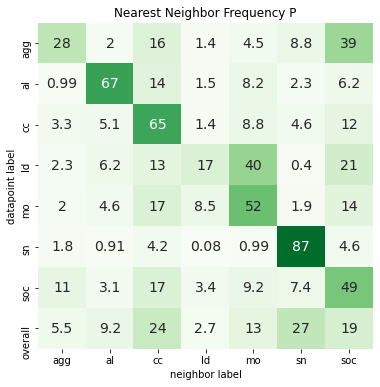

In [29]:
if OVERWRITE_FIGURES:
    outname = os.path.join(os.path.sep, FIGURES, 'trad_heatS_UMAP_reduced.png')
else:
    outname=None

print(outname)
nn_stats.plot_heat_S(outname=outname)

/home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/trad_heatSnorm_UMAP_reduced.png


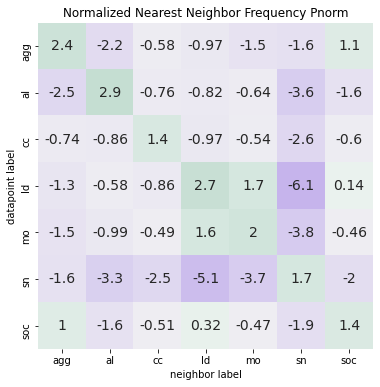

In [30]:
if OVERWRITE_FIGURES:
    outname = os.path.join(os.path.sep, FIGURES, 'trad_heatSnorm_UMAP_reduced.png')
else:
    outname=None

print(outname)
nn_stats.plot_heat_Snorm(outname=outname)

/home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/trad_heatfold_UMAP_reduced.png


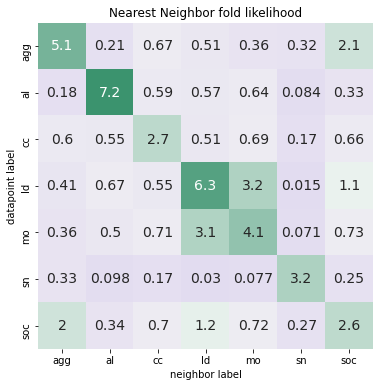

In [31]:
if OVERWRITE_FIGURES:
    outname = os.path.join(os.path.sep, FIGURES, 'trad_heatfold_UMAP_reduced.png')
else:
    outname=None

print(outname)
nn_stats.plot_heat_fold(outname=outname)

# Plot within vs. outside distances

/home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/trad_distanceswithinwithout_reduced.png


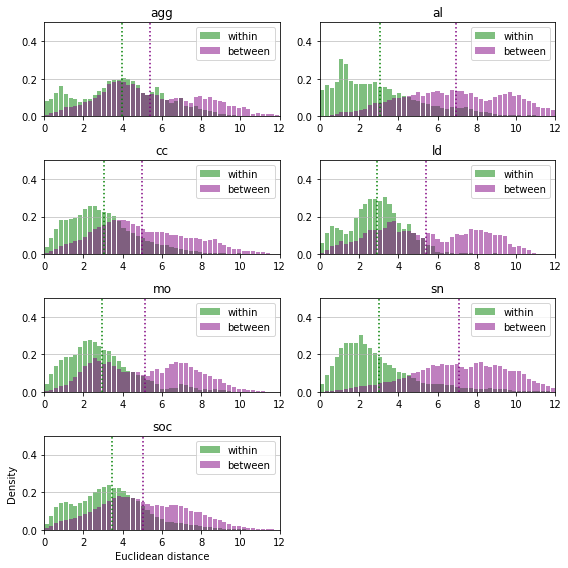

In [32]:
from evaluation_functions import plot_within_without

if OVERWRITE_FIGURES:
    outname = os.path.join(os.path.sep, FIGURES,"trad_distanceswithinwithout_"+dftype+".png")
else:
    outname=None

print(outname)
plot_within_without(embedding=embedding_trad, labels=labels, outname=outname)

# Silhouette plot

In [33]:
sil_stats = sil(embedding_trad, labels)

/home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/trad_silplot_UMAP_reduced.png


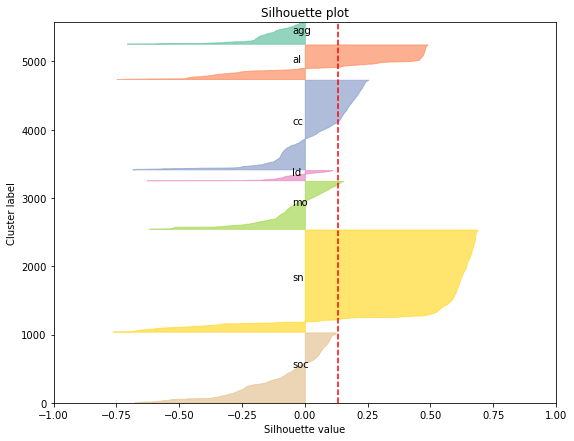

In [34]:
if OVERWRITE_FIGURES:
    outname = os.path.join(os.path.sep, FIGURES, 'trad_silplot_UMAP_'+dftype+'.png')
else:
    outname=None

print(outname)
sil_stats.plot_sil(outname=outname)

In [35]:
sil_stats.get_avrg_score()

0.13054569

In [36]:
sil_stats_spec = sil(embedding, labels)
sil_stats_spec.get_avrg_score()

0.22667249

# Graph from embedding evaluation

Graph saved at  /home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/trad_simgraph_test.png


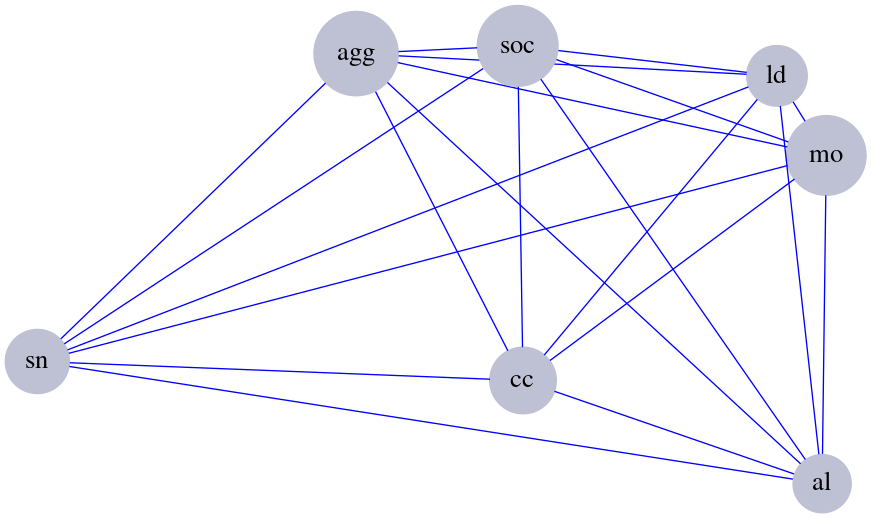

In [48]:
if OVERWRITE_FIGURES:
    outname = os.path.join(os.path.sep,FIGURES,'trad_simgraph_test.png')
else:
    outname=None

G = nn_stats.draw_simgraph(outname)
Image(G.draw(format='png',prog='neato'), width=400, height=600)

# Visualize example nearest neighbors

In [49]:
import random
import scipy
from sklearn.neighbors import NearestNeighbors

In [50]:
knn=5
# Find k nearest neighbors
nbrs = NearestNeighbors(metric='euclidean',n_neighbors=knn+1, algorithm='brute').fit(embedding_trad)
distances, indices = nbrs.kneighbors(embedding_trad)

# need to remove the first neighbor, because that is the datapoint itself
indices = indices[:,1:]  
distances = distances[:,1:]

In [51]:
N_MELS = 40 # --> number of mel bins (usually 20-40)
            # The frequency bins are transformed to this number of logarithmically spaced mel bins.
FFT_WIN = 0.03 # --> length of audio chunk when applying STFT in seconds
               # FFT_WIN * samplerate = number of audio datapoints that go in one fft (=n_fft)
FFT_HOP = FFT_WIN/8 # --> hop_length in seconds
WINDOW = 'hann' 
FMIN = 0 
FMAX = 4000 

calltypes = sorted(list(set(total_df['call_lable'])))
labels = total_df.call_lable.values
#names = spec_df.Name.values

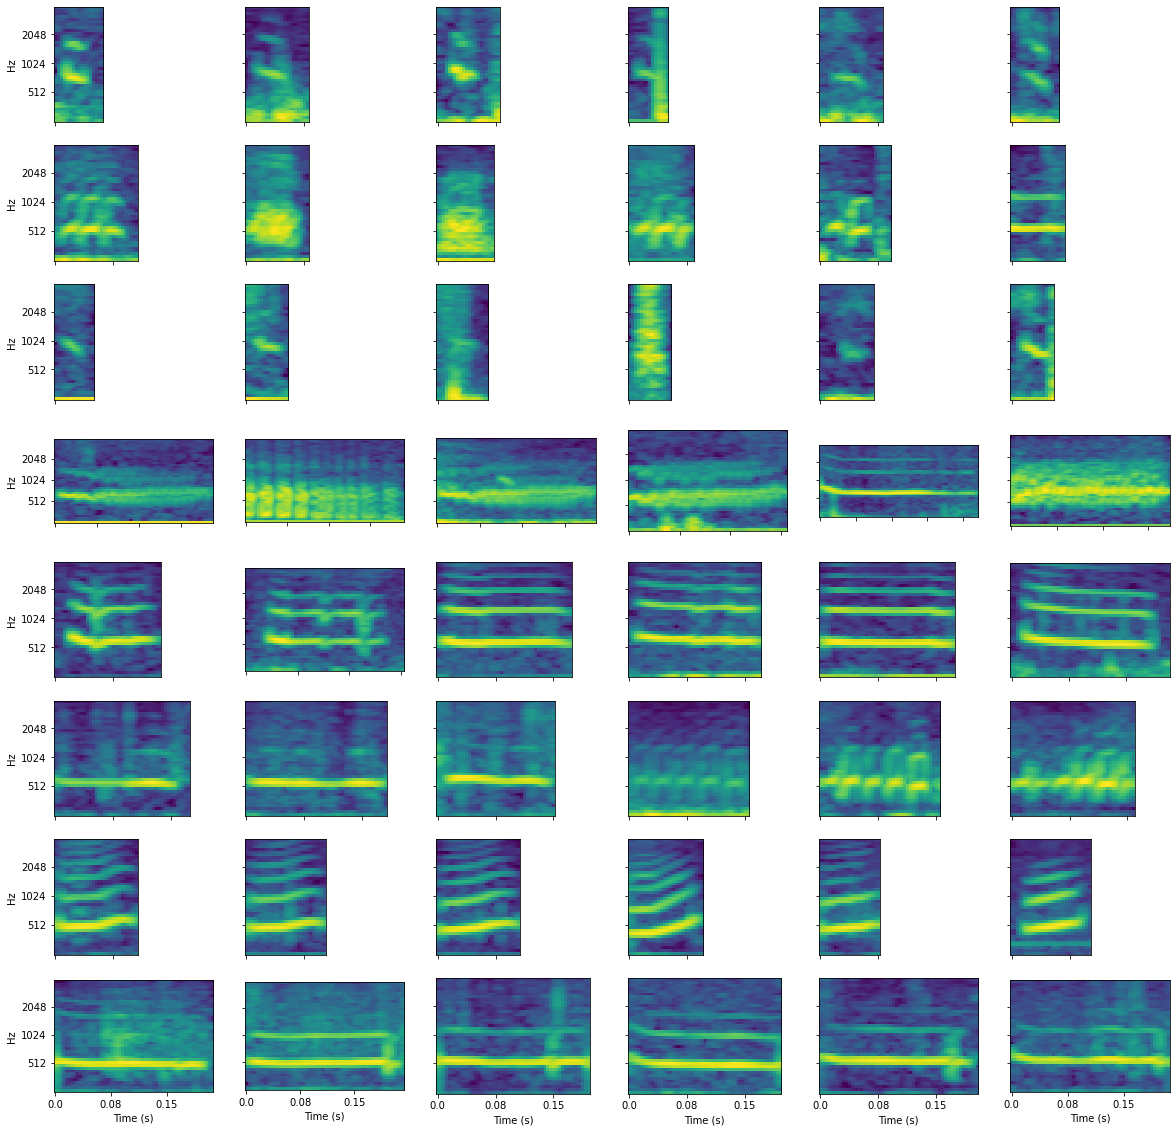

In [52]:
# Randomly choose 10 calls and plot their 4 nearest neighbors

n_examples = 8
major_tick_interval = 20
f_to_s = 0.00375
rotate_x = 0

fig = plt.figure(figsize=(20,20))
fig_name = 'NN_viz.png'
k=1

# randomly choose
random.seed(1)
example_indices = random.sample(list(range(embedding_trad.shape[0])), n_examples)
freq_label_list = ['512', '1024', '2048']

            

for i,ind in enumerate(example_indices):
    
    # Plot the random example spectrogram
    
    img_of_interest = total_df.iloc[ind,:].spectrograms
    embedding_of_interest = embedding_trad[ind,:]
    plt.subplot(n_examples, knn+1, k)
    
    # Align specs to left
    ax = plt.gca()
    ax.set_anchor('W')
    #sr = spec_df.iloc[ind,:].samplerate_hz
    #librosa.display.specshow(img_of_interest,sr=SR, hop_length=int(FFT_HOP * SR) , fmin=FMIN, fmax=FMAX, y_axis='mel', x_axis='s',cmap='viridis')
    
    plt.imshow(img_of_interest, interpolation='nearest', origin='lower', aspect='equal')  
    
    # Set axis ticks and labels
    
    major_xticks = np.arange(0,img_of_interest.shape[1], major_tick_interval) # set major ticks in 0.5s steps
    major_xtick_labels = ["" for x in major_xticks] 
        
    major_yticks = [10,20,30]
    major_ytick_labels = freq_label_list
    
    # If lowest row, add x tick labels
    if i==(n_examples-1):
        major_xtick_labels = [round(x*f_to_s,2) for x in major_xticks]
        plt.xlabel('Time (s)')
    
    plt.ylabel('Hz')
    plt.xticks(major_xticks, major_xtick_labels, rotation=rotate_x)
    plt.yticks(major_yticks, major_ytick_labels,)  
    
    k=k+1

    nearest_neighbors = indices[ind]
    for neighbor in nearest_neighbors:

        neighbor_embedding = embedding_trad[neighbor,:]
        dist_to_original = scipy.spatial.distance.euclidean(embedding_of_interest, neighbor_embedding)
        neighbor_img = total_df.iloc[neighbor,:].spectrograms
        
        plt.subplot(n_examples, knn+1, k)
        #sr = spec_df.iloc[neighbor,:].samplerate_hz
        #librosa.display.specshow(neighbor_img,sr=sr, hop_length=int(FFT_HOP * sr) , fmin=FMIN, fmax=FMAX, y_axis='mel', x_axis='s',cmap='viridis')        
        plt.imshow(neighbor_img, interpolation='nearest', origin='lower', aspect='equal') 
        
        # Align specs to the left
        ax = plt.gca()
        ax.set_anchor('W')
        
        major_xticks = np.arange(0,neighbor_img.shape[1], major_tick_interval) # set major ticks in 0.5s steps
        major_xtick_labels = ["" for x in major_xticks] 
        
        major_yticks = [10,20,30]
        major_ytick_labels = ["" for x in major_yticks]
        
        
        if k>=(n_examples*(knn+1)-knn):
            major_xtick_labels = [round(x*f_to_s,2) for x in major_xticks]
            plt.xlabel('Time (s)')
        
        plt.yticks(major_yticks, major_ytick_labels)
        plt.xticks(major_xticks, major_xtick_labels, rotation=rotate_x)  
    
    
        k=k+1

#plt.savefig(os.path.join(os.path.sep,FIGURES,fig_name), facecolor="white")

# Paper figures

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.legend import Legend
import matplotlib
import seaborn as sns
import string

## Overview and neighbor evaluation matrices

### 3D

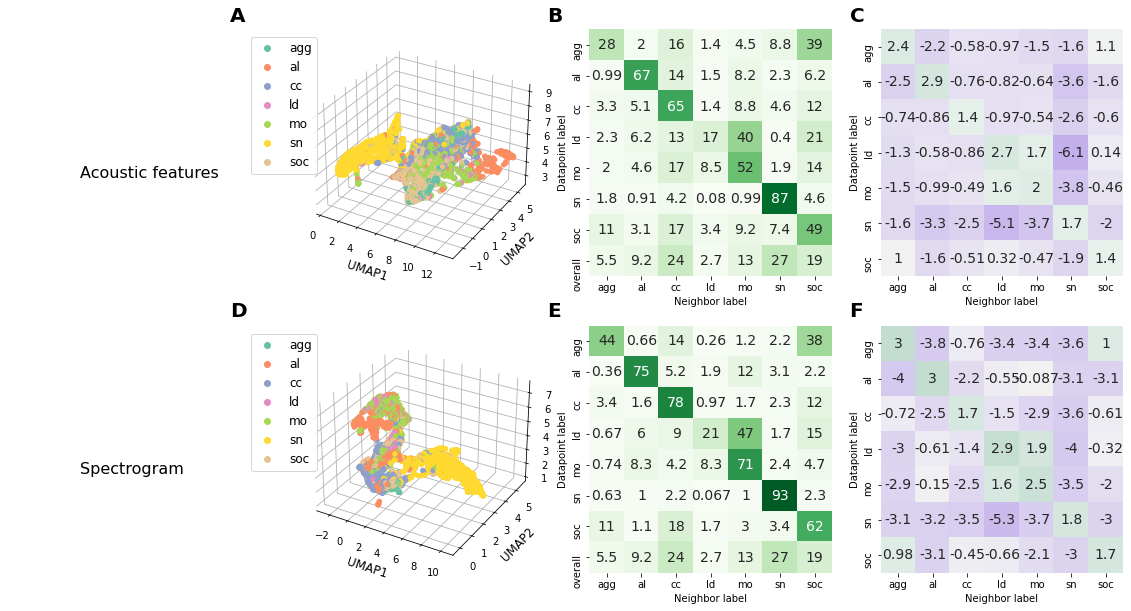

In [39]:
nrows = 2
ncols = 4
k=1

norm_palette = sns.diverging_palette(h_neg=275,s=80,l=55, h_pos=150, as_cmap=True)
abs_palette = sns.color_palette("Greens", as_cmap=True)


plt.figure(figsize=(20,10), facecolor="white")

plt.subplot(nrows,ncols,k)
plt.axis('off')
plt.text(0.3,0.4, 'Acoustic features', fontsize=16)
k+=1

# 3D scatter plot
ax = plt.subplot(nrows,ncols,k, projection='3d')

scat_labels = labels
mycolors = "Set2"

labeltypes = sorted(list(set(scat_labels)))
pal = sns.color_palette(mycolors, n_colors=len(labeltypes))
color_dict = dict(zip(labeltypes, pal))
c = [color_dict[val] for val in scat_labels]
Axes3D.scatter(ax,
               xs = embedding_trad[:,0],
               ys = embedding_trad[:,1],
               zs = embedding_trad[:,2],
               zdir='z',
               s=20,
               label = c,
               c=c,
               depthshade=False)

ax.set_xlabel('UMAP1', fontsize=12)
ax.set_ylabel('UMAP2', fontsize=12)
#ax.set_zlabel('UMAP3', fontsize=12)
    
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
    
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

scatters = []
for label in labeltypes:
    scatters.append(matplotlib.lines.Line2D([0],[0], linestyle="none", c=color_dict[label], marker = 'o'))
ax.legend(scatters, labeltypes, numpoints = 1, fontsize=12, loc='upper right', bbox_to_anchor=(0.1,1))
k+=1

p1 = plt.subplot(nrows,ncols,k)
p1 = sns.heatmap(nn_stats.get_statstab(), annot=True, vmin=0, vmax=100, center=50, cmap=abs_palette, cbar=None, annot_kws={"size":14})
p1.set_xlabel("Neighbor label")
p1.set_ylabel("Datapoint label")
k+=1

p1 = plt.subplot(nrows,ncols,k)
p1 = sns.heatmap(nn_stats.get_statstabnorm(), annot=True,  vmin=-13, vmax=13, center=1, cmap=norm_palette, cbar=None, annot_kws={"size":14})
p1.set_xlabel("Neighbor label")
p1.set_ylabel("Datapoint label")
k+=1

# spectrogram

plt.subplot(nrows,ncols,k)
plt.axis('off')
plt.text(0.3,0.4, 'Spectrogram', fontsize=16)
k=k+1

# 3D scatter plot
ax = plt.subplot(nrows,ncols,k, projection='3d')

scat_labels = labels
mycolors = "Set2"

labeltypes = sorted(list(set(scat_labels)))
pal = sns.color_palette(mycolors, n_colors=len(labeltypes))
color_dict = dict(zip(labeltypes, pal))
c = [color_dict[val] for val in scat_labels]
Axes3D.scatter(ax,
               xs = embedding[:,0],
               ys = embedding[:,1],
               zs = embedding[:,2],
               zdir='z',
               s=20,
               label = c,
               c=c,
               depthshade=False)

ax.set_xlabel('UMAP1', fontsize=12)
ax.set_ylabel('UMAP2', fontsize=12)
#ax.set_zlabel('UMAP3', fontsize=12)
    
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
    
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

scatters = []
for label in labeltypes:
    scatters.append(matplotlib.lines.Line2D([0],[0], linestyle="none", c=color_dict[label], marker = 'o'))
ax.legend(scatters, labeltypes, numpoints = 1, fontsize=12,loc='upper right', bbox_to_anchor=(0.1,1))
k+=1

nn_stats_spec = nn(embedding, np.asarray(labels), k=5)
p1 = plt.subplot(nrows,ncols,k)
p1 = sns.heatmap(nn_stats_spec.get_statstab(), annot=True, vmin=0, vmax=100, center=50, cmap=abs_palette, cbar=None, annot_kws={"size":14})
p1.set_xlabel("Neighbor label")
p1.set_ylabel("Datapoint label")
k+=1
p1 = plt.subplot(nrows,ncols,k)
p1 = sns.heatmap(nn_stats_spec.get_statstabnorm(), annot=True,  vmin=-13, vmax=13, center=0, cmap=norm_palette, cbar=None, annot_kws={"size":14})
p1.set_xlabel("Neighbor label")
p1.set_ylabel("Datapoint label")


plt.figtext(0.28,0.89, "A", size=20, weight='bold')
plt.figtext(0.5,0.89, "B", size=20, weight='bold')
plt.figtext(0.71,0.89, "C", size=20, weight='bold')
plt.figtext(0.28,0.48, "D", size=20, weight='bold')
plt.figtext(0.5,0.48, "E", size=20, weight='bold')
plt.figtext(0.71,0.48, "F", size=20, weight='bold')

plt.savefig(os.path.join(os.path.sep, FIGURES, 'paper_trad_comparison.png'), facecolor="white", bbox_inches="tight")

### 2D

Text(0.71, 0.48, 'F')

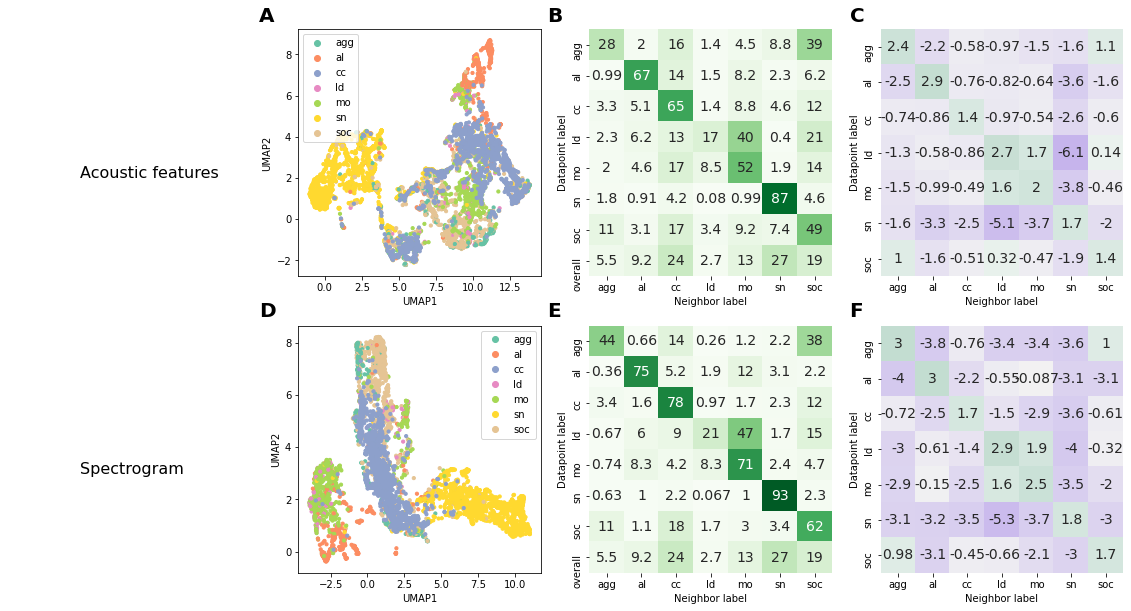

In [39]:
nrows = 2
ncols = 4
k=1

norm_palette = sns.diverging_palette(h_neg=275,s=80,l=55, h_pos=150, as_cmap=True)
abs_palette = sns.color_palette("Greens", as_cmap=True)

scat_labels = labels
mycolors = "Set2"

plt.figure(figsize=(20,10), facecolor="white")

plt.subplot(nrows,ncols,k)
plt.axis('off')
plt.text(0.3,0.4, 'Acoustic features', fontsize=16)
k+=1

# 2D scatter plot
plt.subplot(nrows,ncols,k)
labeltypes = sorted(list(set(scat_labels)))
pal = sns.color_palette(mycolors, n_colors=len(labeltypes))
color_dict = dict(zip(labeltypes, pal))
c = [color_dict[val] for val in scat_labels]
    
plt.scatter(embedding_trad_2D[:,0], embedding_trad_2D[:,1], alpha=1,s=10, c=c)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2');

scatters = []
for label in labeltypes:
    scatters.append(matplotlib.lines.Line2D([0],[0], linestyle="none", c=color_dict[label], marker = 'o'))
plt.legend(scatters, labeltypes, numpoints = 1, loc='upper left') 
k=k+1
        
p1 = plt.subplot(nrows,ncols,k)
p1 = sns.heatmap(nn_stats.get_statstab(), annot=True, vmin=0, vmax=100, center=50, cmap=abs_palette, cbar=None, annot_kws={"size":14})
p1.set_xlabel("Neighbor label")
p1.set_ylabel("Datapoint label")
k+=1

p1 = plt.subplot(nrows,ncols,k)
p1 = sns.heatmap(nn_stats.get_statstabnorm(), annot=True,  vmin=-13, vmax=13, center=0, cmap=norm_palette, cbar=None, annot_kws={"size":14})
p1.set_xlabel("Neighbor label")
p1.set_ylabel("Datapoint label")
k+=1

# spectrogram

plt.subplot(nrows,ncols,k)
plt.axis('off')
plt.text(0.3,0.4, 'Spectrogram', fontsize=16)
k=k+1

# 2D scatter plot
plt.subplot(nrows,ncols,k)
labeltypes = sorted(list(set(scat_labels)))
pal = sns.color_palette(mycolors, n_colors=len(labeltypes))
color_dict = dict(zip(labeltypes, pal))
c = [color_dict[val] for val in scat_labels]
    
plt.scatter(embedding_2D[:,0], embedding_2D[:,1], alpha=1,s=10, c=c)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2');

scatters = []
for label in labeltypes:
    scatters.append(matplotlib.lines.Line2D([0],[0], linestyle="none", c=color_dict[label], marker = 'o'))
plt.legend(scatters, labeltypes, numpoints = 1) 
k=k+1


nn_stats_spec = nn(embedding, np.asarray(labels), k=5)
p1 = plt.subplot(nrows,ncols,k)
p1 = sns.heatmap(nn_stats_spec.get_statstab(), annot=True, vmin=0, vmax=100, center=50, cmap=abs_palette, cbar=None, annot_kws={"size":14})
p1.set_xlabel("Neighbor label")
p1.set_ylabel("Datapoint label")
k+=1
p1 = plt.subplot(nrows,ncols,k)
p1 = sns.heatmap(nn_stats_spec.get_statstabnorm(), annot=True,  vmin=-13, vmax=13, center=0, cmap=norm_palette, cbar=None, annot_kws={"size":14})
p1.set_xlabel("Neighbor label")
p1.set_ylabel("Datapoint label")


plt.figtext(0.3,0.89, "A", size=20, weight='bold')
plt.figtext(0.5,0.89, "B", size=20, weight='bold')
plt.figtext(0.71,0.89, "C", size=20, weight='bold')
plt.figtext(0.3,0.48, "D", size=20, weight='bold')
plt.figtext(0.5,0.48, "E", size=20, weight='bold')
plt.figtext(0.71,0.48, "F", size=20, weight='bold')

#plt.savefig(os.path.join(os.path.sep, FIGURES, 'paper_trad_comparison_2D.png'), facecolor="white", bbox_inches="tight")

In [ ]:
pl.ylabel('Total resistance\n$\\regular_{{m}^{4} kg^{-1}s^{-1}}$', fontsize=20)

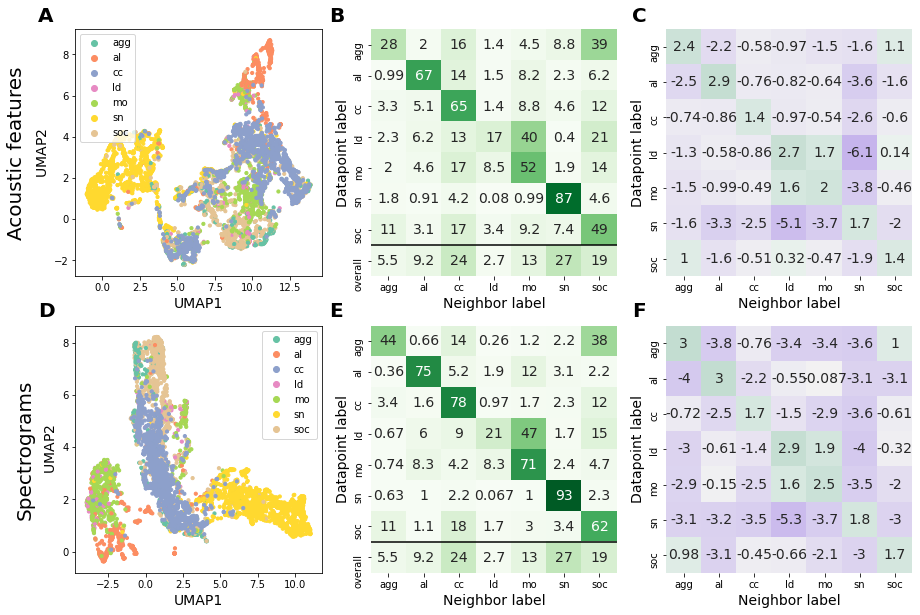

In [69]:
nrows = 2
ncols = 3
k=1

norm_palette = sns.diverging_palette(h_neg=275,s=80,l=55, h_pos=150, as_cmap=True)
abs_palette = sns.color_palette("Greens", as_cmap=True)

scat_labels = labels
mycolors = "Set2"
fsize = 14

plt.figure(figsize=(15,10), facecolor="white")

# 2D scatter plot
plt.subplot(nrows,ncols,k)
labeltypes = sorted(list(set(scat_labels)))
pal = sns.color_palette(mycolors, n_colors=len(labeltypes))
color_dict = dict(zip(labeltypes, pal))
c = [color_dict[val] for val in scat_labels]
    
plt.scatter(embedding_trad_2D[:,0], embedding_trad_2D[:,1], alpha=1,s=10, c=c)
plt.xlabel('UMAP1', fontsize=fsize)
#plt.ylabel('UMAP2');
plt.ylabel('Acoustic features\n$\\regular_{UMAP2}$', fontsize=20)

scatters = []
for label in labeltypes:
    scatters.append(matplotlib.lines.Line2D([0],[0], linestyle="none", c=color_dict[label], marker = 'o'))
plt.legend(scatters, labeltypes, numpoints = 1, loc='upper left') 
k=k+1
        
p1 = plt.subplot(nrows,ncols,k)
p1 = sns.heatmap(nn_stats.get_statstab(), annot=True, vmin=0, vmax=100, center=50, cmap=abs_palette, cbar=None, annot_kws={"size":14})
p1.set_xlabel("Neighbor label", fontsize=fsize)
p1.set_ylabel("Datapoint label", fontsize=fsize)
p1.axhline(y=len(set(labels)), color="black")
k+=1

p1 = plt.subplot(nrows,ncols,k)
p1 = sns.heatmap(nn_stats.get_statstabnorm(), annot=True,  vmin=-13, vmax=13, center=0, cmap=norm_palette, cbar=None, annot_kws={"size":14})
p1.set_xlabel("Neighbor label", fontsize=fsize)
p1.set_ylabel("Datapoint label", fontsize=fsize)
k+=1

# spectrogram


# 2D scatter plot
plt.subplot(nrows,ncols,k)
labeltypes = sorted(list(set(scat_labels)))
pal = sns.color_palette(mycolors, n_colors=len(labeltypes))
color_dict = dict(zip(labeltypes, pal))
c = [color_dict[val] for val in scat_labels]
    
plt.scatter(embedding_2D[:,0], embedding_2D[:,1], alpha=1,s=10, c=c)
plt.xlabel('UMAP1', fontsize=fsize)
#plt.ylabel('UMAP2');
plt.ylabel('Spectrograms\n$\\regular_{UMAP2}$', fontsize=20)

scatters = []
for label in labeltypes:
    scatters.append(matplotlib.lines.Line2D([0],[0], linestyle="none", c=color_dict[label], marker = 'o'))
plt.legend(scatters, labeltypes, numpoints = 1) 
k=k+1


nn_stats_spec = nn(embedding, np.asarray(labels), k=5)
p1 = plt.subplot(nrows,ncols,k)
p1 = sns.heatmap(nn_stats_spec.get_statstab(), annot=True, vmin=0, vmax=100, center=50, cmap=abs_palette, cbar=None, annot_kws={"size":14})
p1.set_xlabel("Neighbor label", fontsize=fsize)
p1.set_ylabel("Datapoint label", fontsize=fsize)
p1.axhline(y=len(set(labels)), color="black")
k+=1
p1 = plt.subplot(nrows,ncols,k)
p1 = sns.heatmap(nn_stats_spec.get_statstabnorm(), annot=True,  vmin=-13, vmax=13, center=0, cmap=norm_palette, cbar=None, annot_kws={"size":14})
p1.set_xlabel("Neighbor label", fontsize=fsize)
p1.set_ylabel("Datapoint label", fontsize=fsize)


plt.figtext(0.09,0.89, "A", size=20, weight='bold')
plt.figtext(0.36,0.89, "B", size=20, weight='bold')
plt.figtext(0.64,0.89, "C", size=20, weight='bold')
plt.figtext(0.09,0.48, "D", size=20, weight='bold')
plt.figtext(0.36,0.48, "E", size=20, weight='bold')
plt.figtext(0.64,0.48, "F", size=20, weight='bold')

plt.savefig(os.path.join(os.path.sep, FIGURES, 'paper_trad_comparison_2D_other.png'), facecolor="white", bbox_inches="tight")

## Silhouette Fig

In [56]:
from sklearn.metrics import silhouette_samples, silhouette_score

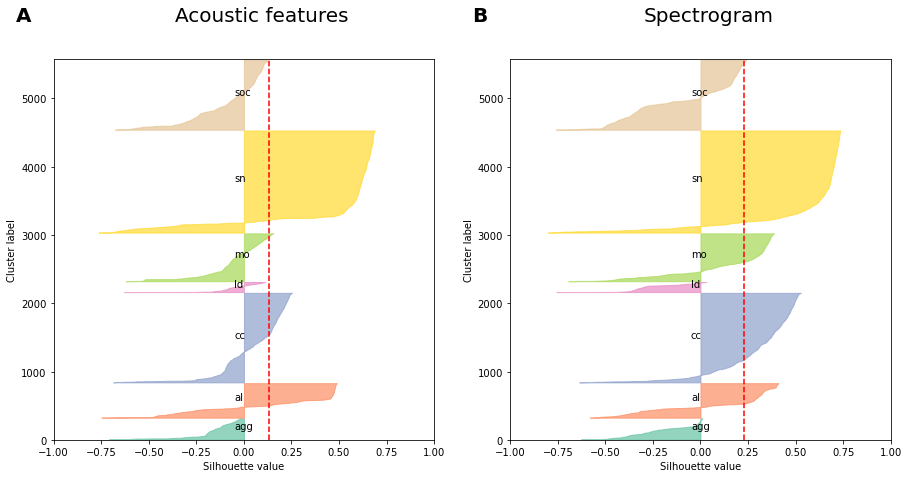

In [57]:
labeltypes = sorted(list(set(labels)))
n_clusters = len(labeltypes)


fig, (ax2, ax1) = plt.subplots(1, 2)
fig.set_size_inches(15, 7)

ax1.set_xlim([-1, 1])

ax1.set_ylim([0, embedding.shape[0] + (n_clusters + 1) * 10])
#cluster_labels = umap_df['HDBSCAN']
cluster_labels = labels
silhouette_avg = silhouette_score(embedding, cluster_labels)


# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(embedding, cluster_labels)
y_lower = 10

pal = sns.color_palette("Set2", n_colors=len(labeltypes))
color_dict = dict(zip(labeltypes, pal))


for i, cluster_label in enumerate(labeltypes):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster_label]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i


    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouette_values,
                    facecolor=color_dict[cluster_label], edgecolor=color_dict[cluster_label], alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, cluster_label)

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_xlabel("Silhouette value")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
      size=20, weight='bold')

ax1.text(0.35, 1.1, "Spectrogram", transform=ax1.transAxes, 
      size=20)


##### ****************************************************
ax2.set_xlim([-1, 1])

ax2.set_ylim([0, embedding_trad.shape[0] + (n_clusters + 1) * 10])
#cluster_labels = umap_df['HDBSCAN']
cluster_labels = labels
silhouette_avg = silhouette_score(embedding_trad, cluster_labels)


# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(embedding_trad, cluster_labels)
y_lower = 10

pal = sns.color_palette("Set2", n_colors=len(labeltypes))
color_dict = dict(zip(labeltypes, pal))


for i, cluster_label in enumerate(labeltypes):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster_label]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i


    ax2.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouette_values,
                    facecolor=color_dict[cluster_label], edgecolor=color_dict[cluster_label], alpha=0.7)
    ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, cluster_label)

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

#ax2.set_title("Original")
ax2.set_xlabel("Silhouette value")
ax2.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax2.axvline(x=silhouette_avg, color="red", linestyle="--")
ax2.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax2.transAxes, 
      size=20, weight='bold')
ax2.text(0.32, 1.1, "Acoustic features", transform=ax2.transAxes, 
      size=20)

#plt.show()
plt.savefig(os.path.join(os.path.sep,FIGURES,'paper_trad_SIL.png'), facecolor="white")

In [59]:
labeltypes = sorted(list(set(labels)))
n_clusters = len(labeltypes)
cluster_labels = labels

# Compute the silhouette scores for each sample
print("****************************")
print("Acoustic features")
print("****************************")
sample_silhouette_values = silhouette_samples(embedding_trad, cluster_labels)
sil_per_type = []
for i, cluster_label in enumerate(labeltypes):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster_label]
    print(cluster_label, ' : ', np.mean(ith_cluster_silhouette_values))
    sil_per_type.append(np.mean(ith_cluster_silhouette_values))
print("Total mean: ", np.mean(np.asarray(sil_per_type)))

print("")
print("****************************")
print("Spectrogram")
print("****************************")
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(embedding, cluster_labels)
sil_per_type = []
for i, cluster_label in enumerate(labeltypes):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster_label]
    print(cluster_label, ' : ', np.mean(ith_cluster_silhouette_values))
    sil_per_type.append(np.mean(ith_cluster_silhouette_values))

print("Total mean: ", np.mean(np.asarray(sil_per_type)))

****************************
Acoustic features
****************************
agg  :  -0.1622536
al  :  0.16830721
cc  :  0.05860594
ld  :  -0.044140026
mo  :  -0.054831225
sn  :  0.48899093
soc  :  -0.08090928
Total mean:  0.053395707

****************************
Spectrogram
****************************
agg  :  -0.18416847
al  :  0.10279434
cc  :  0.30650225
ld  :  -0.24796781
mo  :  0.16019976
sn  :  0.5663382
soc  :  -0.07490171
Total mean:  0.08982808
